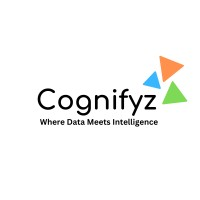

# **Data Analyst Internship**

## **Import all required python packages**

In [ ]:
!pip install nltk
!pip install seaborn

In [ ]:
import nltk
import folium
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy.stats import chi2_contingency
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv("Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# **Level 1**
## **Task 1:**  Top Cuisines
Determine the top three most
common cuisines in the dataset.
Calculate the percentage of
restaurants that serve each of the top
cuisines

In [ ]:
cuisine_counts = df['Cuisines'].value_counts()
cuisine_counts

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [ ]:
top_three_cuisines = cuisine_counts.head(3)
top_three_cuisines

North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64

In [ ]:
total_restaurants = len(df)
percentage_top_cuisine1 = (top_three_cuisines[0] / total_restaurants) * 100
percentage_top_cuisine2 = (top_three_cuisines[1] / total_restaurants) * 100
percentage_top_cuisine3 = (top_three_cuisines[2] / total_restaurants) * 100

In [ ]:
print("Top Three Cuisines:")
print(top_three_cuisines)
print("\nPercentage of Restaurants Serving Each Top Cuisine:")
print(f"{top_three_cuisines.index[0]}: {percentage_top_cuisine1:.2f}%")
print(f"{top_three_cuisines.index[1]}: {percentage_top_cuisine2:.2f}%")
print(f"{top_three_cuisines.index[2]}: {percentage_top_cuisine3:.2f}%")

Top Three Cuisines:
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64

Percentage of Restaurants Serving Each Top Cuisine:
North Indian: 9.80%
North Indian, Chinese: 5.35%
Chinese: 3.71%


## **Task 2:** City Analysis
Identify the city with the highest number
of restaurants in the dataset.
Calculate the average rating for
restaurants in each city.
Determine the city with the highest
average rating.

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
#Identify the city with the highest number of restaurants in the dataset.
restaurant_count_per_city = df['City'].value_counts()
restaurant_count_per_city

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [ ]:
# Calculate the average rating for restaurants in each city.
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()
average_rating_per_city

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

In [ ]:
# Find the city with the highest number of restaurants
city_with_highest_restaurants = restaurant_count_per_city.idxmax()
highest_restaurant_count = restaurant_count_per_city.max()

In [ ]:
city_with_highest_restaurants

'New Delhi'

In [ ]:
highest_restaurant_count

5473

In [ ]:
# Find the city with the highest average rating
city_with_highest_average_rating = average_rating_per_city.idxmax()
highest_average_rating = average_rating_per_city.max()

In [ ]:
city_with_highest_average_rating

'Inner City'

In [ ]:
highest_average_rating

4.9

In [ ]:
print("City with the Highest Number of Restaurants:")
print(f"{city_with_highest_restaurants} ({highest_restaurant_count} restaurants)")

print("\nCity with the Highest Average Rating:")
print(f"{city_with_highest_average_rating} (Average Rating: {highest_average_rating:.2f})")

City with the Highest Number of Restaurants:
New Delhi (5473 restaurants)

City with the Highest Average Rating:
Inner City (Average Rating: 4.90)


## **Task 3:** Price Range Distribution
Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.
Calculate the percentage of restaurants
in each price range category.

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Calculate the count of each price range
price_range_counts = df['Price range'].value_counts()

bar_trace = go.Bar(
    x=price_range_counts.index,
    y=price_range_counts.values,
    marker=dict(color='lightgreen', line=dict(color='black', width=1))
)

layout = go.Layout(
    title='Price Range Distribution',
    xaxis=dict(title='Price Range'),
    yaxis=dict(title='Number of Restaurants'),
    bargap=0.1,  # Gap between bars
    width=1400,  # Set the width of the figure
    height=700  # Set the height of the figure
)

fig = go.Figure(data=[bar_trace], layout=layout)

# Show the bar chart
pyo.iplot(fig)

In [ ]:
#Calculate the percentage of restaurants in each price range category
price_range_counts = df['Price range'].value_counts()
total_restaurants = len(df)
percentage_per_price_range = (price_range_counts / total_restaurants) * 100

In [ ]:
#the percentage of restaurants in each price range category
print("Percentage of Restaurants in Each Price Range Category:")
for price_range, percentage in percentage_per_price_range.items():
    print(f"price range: {price_range}   :   Percentage: {percentage:.2f}%")

Percentage of Restaurants in Each Price Range Category:
price range: 1   :   Percentage: 46.53%
price range: 2   :   Percentage: 32.59%
price range: 3   :   Percentage: 14.74%
price range: 4   :   Percentage: 6.14%


## **Task 4:** Online Delivery
Determine the percentage of restaurants
that offer online delivery.
Compare the average ratings of restaurants
with and without online delivery

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df['Has Online delivery'].dtype

dtype('O')

In [ ]:
# 'Has Online Delivery' column contains 'yes' and 'no'
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [ ]:
df['Has Online delivery'].dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df['Has Online delivery'].nunique()


2

In [ ]:
# the column containing online delivery information is named 'online_delivery'
# Calculate the percentage of restaurants that offer online delivery
total_restaurants = len(df)
restaurants_with_online_delivery = df['Has Online delivery'].sum()
percentage_with_online_delivery = (restaurants_with_online_delivery / total_restaurants) * 100


In [ ]:
# Calculate the average ratings for restaurants with and without online delivery
average_rating_with_delivery = df[df['Has Online delivery'] == 1]['Aggregate rating'].mean()
average_rating_without_delivery = df[df['Has Online delivery'] == 0]['Aggregate rating'].mean()

In [ ]:
print("Percentage of Restaurants Offering Online Delivery:")
print(f"{percentage_with_online_delivery:.2f}%")

Percentage of Restaurants Offering Online Delivery:
25.66%


In [ ]:
print("\nAverage Ratings:")
print(f"Restaurants with Online Delivery: {average_rating_with_delivery:.2f}")
print(f"Restaurants without Online Delivery: {average_rating_without_delivery:.2f}")


Average Ratings:
Restaurants with Online Delivery: 3.25
Restaurants without Online Delivery: 2.47


# **Level 2**
## **Task 1:** Restaurant Ratings
Analyze the distribution of aggregate
ratings and determine the most common
rating range.
Calculate the average number of votes
received by restaurants.

In [ ]:
# Create a histogram trace
hist_trace = go.Histogram(
    x=df['Aggregate rating'],
    nbinsx=20,  # Number of bins
    marker=dict(color='lightgreen', line=dict(color='black', width=1))
)

layout = go.Layout(
    title='Distribution of Aggregate Ratings',
    xaxis=dict(title='Aggregate Rating'),
    yaxis=dict(title='Number of Restaurants'),
    bargap=0.1,  # Gap between bars
    width=1400,  # Set the width of the figure
    height=700  # Set the height of the figure

)

fig = go.Figure(data=[hist_trace], layout=layout)
pyo.iplot(fig)

In [ ]:
# Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()
print("Average Number of Votes Received by Restaurants:", average_votes)

Average Number of Votes Received by Restaurants: 156.909747670401


## **Task 2:** Cuisine Combination
Identify the most common combinations of
cuisines in the dataset.
Determine if certain cuisine combinations
tend to have higher ratings.

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,0,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,0,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,0,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,0,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,0,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df['Cuisines'].dtype

dtype('O')

In [ ]:
#'Cuisines' column contains comma-separated strings
df['Cuisines'] = df['Cuisines'].str.split(', ')  # Split the comma-separated strings into lists

In [ ]:
# Now, 'Cuisines' column should contain lists of cuisines
# Combine the cuisines into a single string with a specific separator (e.g., ', ')
df['Cuisine_Combination'] = df['Cuisines'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

In [ ]:
# Count the occurrences of each cuisine combination
cuisine_combination_counts = df['Cuisine_Combination'].value_counts()
# Calculate the average rating for each cuisine combination
average_rating_per_combination = df.groupby('Cuisine_Combination')['Aggregate rating'].mean()


In [ ]:
# Print the most common cuisine combinations
most_common_combinations = cuisine_combination_counts.head(10)
print("Top 10 Most Common Cuisine Combinations:")
print(most_common_combinations)


Top 10 Most Common Cuisine Combinations:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisine_Combination, dtype: int64


In [ ]:
# Print the average rating for the most common cuisine combinations
print("\nAverage Ratings for the Most Common Cuisine Combinations:")
for combination, count in most_common_combinations.items():
    avg_rating = average_rating_per_combination[combination]
    print(f"{combination}:     Average Rating {avg_rating:.2f}, Count {count}")


Average Ratings for the Most Common Cuisine Combinations:
North Indian:     Average Rating 1.67, Count 936
North Indian, Chinese:     Average Rating 2.42, Count 511
Chinese:     Average Rating 2.04, Count 354
Fast Food:     Average Rating 2.12, Count 354
North Indian, Mughlai:     Average Rating 2.89, Count 334
Cafe:     Average Rating 2.89, Count 299
Bakery:     Average Rating 1.92, Count 218
North Indian, Mughlai, Chinese:     Average Rating 2.57, Count 197
Bakery, Desserts:     Average Rating 2.32, Count 170
Street Food:     Average Rating 2.16, Count 149


In [ ]:
# Createing a DataFrame
data = {
    "Cuisine Combination": ["North Indian", "North Indian, Chinese", "Chinese", "Fast Food", "North Indian, Mughlai",
                            "Cafe", "Bakery", "North Indian, Mughlai, Chinese", "Bakery, Desserts", "Street Food"],
    "Average Rating": [1.67, 2.42, 2.04, 2.12, 2.89, 2.89, 1.92, 2.57, 2.32, 2.16],
    "Count": [936, 511, 354, 354, 334, 299, 218, 197, 170, 149]
}

df_data = pd.DataFrame(data)
df_data


,Cuisine Combination,Average Rating,Count
0,North Indian,1.67,936
1,"North Indian, Chinese",2.42,511
2,Chinese,2.04,354
3,Fast Food,2.12,354
4,"North Indian, Mughlai",2.89,334
5,Cafe,2.89,299
6,Bakery,1.92,218
7,"North Indian, Mughlai, Chinese",2.57,197
8,"Bakery, Desserts",2.32,170
9,Street Food,2.16,149


## **Task 3:** Geographic Analysis
Plot the locations of restaurants on a
map using longitude and latitude
coordinates.
Identify any patterns or clusters of
restaurants in specific areas.

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine_Combination
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",...,Yes,0,No,No,3,4.8,Dark Green,Excellent,314,"French, Japanese, Desserts"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,[Japanese],...,Yes,0,No,No,3,4.5,Dark Green,Excellent,591,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",...,Yes,0,No,No,4,4.4,Green,Very Good,270,"Seafood, Asian, Filipino, Indian"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"[Japanese, Sushi]",...,No,0,No,No,4,4.9,Dark Green,Excellent,365,"Japanese, Sushi"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"[Japanese, Korean]",...,Yes,0,No,No,4,4.8,Dark Green,Excellent,229,"Japanese, Korean"


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine_Combination'],
      dtype='object')

In [ ]:
map_center = [20.5937, 78.9629]  # Use your specific latitude and longitude values

# Create a map centered at the specified location
restaurant_map = folium.Map(location=map_center, zoom_start=12)  # Adjust zoom level as needed

# Iterate through your dataset and add restaurant markers to the map
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],  # Adjust the popup content as needed
        icon=folium.Icon(color='blue')  # Customize the marker appearance
    ).add_to(restaurant_map)
restaurant_map.save('restaurant_locations_map.html')

In [ ]:
display(restaurant_map)

Output hidden; open in https://colab.research.google.com to view.

## **Task 4:** Restaurant Chains
Identify if there are any restaurant chains
present in the dataset.
Analyze the ratings and popularity of
different restaurant chains.

In [ ]:
# 'Restaurant Name' is the column that contains the restaurant names
# Group the data by 'Restaurant Name' to identify restaurant chains
restaurant_chains = df.groupby('Restaurant Name').size().reset_index(name='Outlet Count')
restaurant_chains

,Restaurant Name,Outlet Count
0,#45,1
1,#Dilliwaala6,1
2,#InstaFreeze,1
3,#OFF Campus,1
4,#Urban Caf��,1
...,...,...
7441,t Lounge by Dilmah,1
7442,tashas,1
7443,wagamama,1
7444,{Niche} - Cafe & Bar,1


In [ ]:
# Calculate the average ratings for each chain
chain_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index(name='Average Rating')
chain_ratings

,Restaurant Name,Average Rating
0,#45,3.6
1,#Dilliwaala6,3.7
2,#InstaFreeze,0.0
3,#OFF Campus,3.7
4,#Urban Caf��,3.3
...,...,...
7441,t Lounge by Dilmah,3.6
7442,tashas,4.1
7443,wagamama,3.7
7444,{Niche} - Cafe & Bar,4.1


In [ ]:
# Merge the chain dataframes to combine outlet count and average rating
restaurant_chains = pd.merge(restaurant_chains, chain_ratings, on='Restaurant Name')
restaurant_chains

,Restaurant Name,Outlet Count,Average Rating
0,#45,1,3.6
1,#Dilliwaala6,1,3.7
2,#InstaFreeze,1,0.0
3,#OFF Campus,1,3.7
4,#Urban Caf��,1,3.3
...,...,...,...
7441,t Lounge by Dilmah,1,3.6
7442,tashas,1,4.1
7443,wagamama,1,3.7
7444,{Niche} - Cafe & Bar,1,4.1


In [ ]:
# Sort the data by average rating or outlet count as needed
# For example, to sort by average rating in descending order:
restaurant_chains = restaurant_chains.sort_values(by='Average Rating', ascending=False)

In [ ]:
print("Top Restaurant Chains by Average Rating:")
print(restaurant_chains.head())

print("\nTop Restaurant Chains by Outlet Count:")
print(restaurant_chains.sort_values(by='Outlet Count', ascending=False).head())

Top Restaurant Chains by Average Rating:
                     Restaurant Name  Outlet Count  Average Rating
5322  Restaurant Mosaic @ The Orient             1             4.9
4177                Ministry of Crab             1             4.9
4135                           Miann             1             4.9
5757         Shorts Burger and Shine             1             4.9
4165                           Milse             1             4.9

Top Restaurant Chains by Outlet Count:
       Restaurant Name  Outlet Count  Average Rating
1098   Cafe Coffee Day            83        2.419277
2098    Domino's Pizza            79        2.740506
6106            Subway            63        2.907937
2716  Green Chick Chop            51        2.672549
4077        McDonald's            48        3.339583


# **Level 3**
## **Task 1:** Restaurant Reviews
Analyze the text reviews to identify the most
common positive and negative keywords.
Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    # Tokenize text
    words = word_tokenize(text.lower())
    # Remove punctuation and stop words
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine_Combination
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",...,Yes,0,No,No,3,4.8,Dark Green,Excellent,314,"French, Japanese, Desserts"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,[Japanese],...,Yes,0,No,No,3,4.5,Dark Green,Excellent,591,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",...,Yes,0,No,No,4,4.4,Green,Very Good,270,"Seafood, Asian, Filipino, Indian"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"[Japanese, Sushi]",...,No,0,No,No,4,4.9,Dark Green,Excellent,365,"Japanese, Sushi"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"[Japanese, Korean]",...,Yes,0,No,No,4,4.8,Dark Green,Excellent,229,"Japanese, Korean"


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine_Combination'],
      dtype='object')

In [ ]:
df['Rating text'].dtype

dtype('O')

In [ ]:
# Apply text preprocessing to the 'Review' column
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Example preprocess_text function
text = df['Rating text']
def preprocess_text1(text):
    if isinstance(text, str):
        return text.lower()  # Apply lower() only to strings
    else:
        return text
preprocess_text1(text)


0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [ ]:
df['Cleaned Review'] = df['Rating text'].apply(preprocess_text)

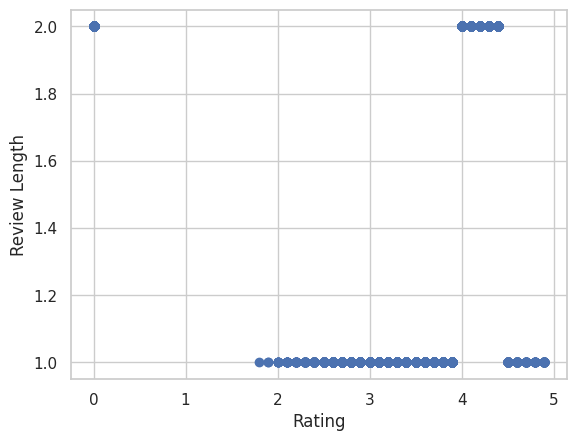

Positive Keywords: ['very', 'good', 'excellent']
Negative Keywords: ['not', 'rated', 'poor']
Average Review Length by Rating:
 Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: review_length, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
#
df['Rating text'] = df['Rating text'].str.lower()
df['Rating text'] = df['Rating text'].str.replace('[^a-zA-Z\s]', '', regex=True)
df['review_length'] = df['Rating text'].apply(lambda x: len(x.split()))

# Token frequency analysis
positive_reviews = df[df['Aggregate rating'] >= 4]['Rating text']
negative_reviews = df[df['Aggregate rating'] <= 2]['Rating text']

positive_keywords = Counter(' '.join(positive_reviews).split()).most_common(10)
negative_keywords = Counter(' '.join(negative_reviews).split()).most_common(10)

# Calculate average review length by rating
average_length_by_rating = df.groupby('Aggregate rating')['review_length'].mean()

# Plot the relationship between review length and rating
plt.scatter(df['Aggregate rating'], df['review_length'])
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

# Print results
print("Positive Keywords:", [keyword[0] for keyword in positive_keywords])
print("Negative Keywords:", [keyword[0] for keyword in negative_keywords])
print("Average Review Length by Rating:\n", average_length_by_rating)


## **Task 2:** Votes Analysis
Identify the restaurants with the highest and
lowest number of votes.
Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [ ]:
# Identify the restaurant with the highest number of votes
highest_votes_restaurant = df[df['Votes'] == df['Votes'].max()]
# Identify the restaurant with the lowest number of votes
lowest_votes_restaurant = df[df['Votes'] == df['Votes'].min()]
# Calculate the correlation between number of votes and rating
correlation = df['Votes'].corr(df['Aggregate rating'])

print("Restaurant with Highest Votes:")
print(highest_votes_restaurant[['Restaurant Name', 'Votes']])
print("\nRestaurant with Lowest Votes:")
print(lowest_votes_restaurant[['Restaurant Name', 'Votes']])
print("\nCorrelation between Votes and Rating:", correlation)

Restaurant with Highest Votes:
    Restaurant Name  Votes
728            Toit  10934

Restaurant with Lowest Votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]

Correlation between Votes and Rating: 0.31369058419541157


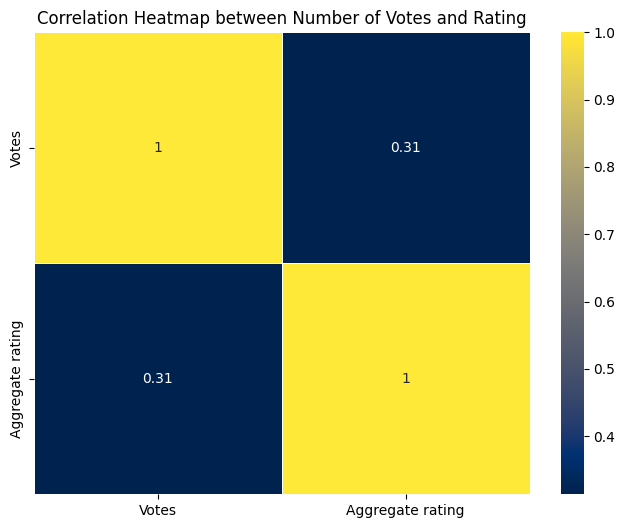


Correlation between Votes and Rating: 0.31369058419541157


In [ ]:
correlation_matrix = df[['Votes', 'Aggregate rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=0.5)
plt.title('Correlation Heatmap between Number of Votes and Rating')
plt.show()
print("\nCorrelation between Votes and Rating:", correlation)

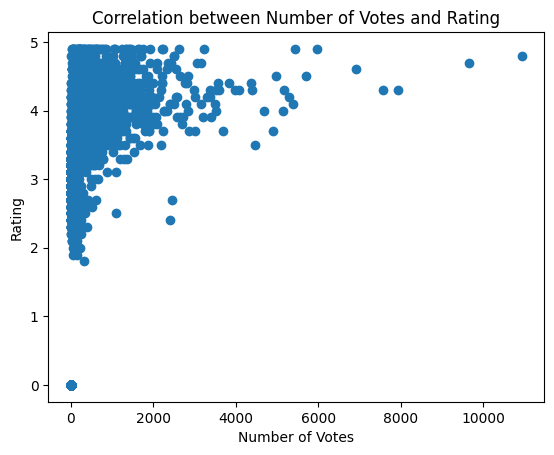

In [ ]:
# Create a scatter plot to visualize the correlation
plt.scatter(df['Votes'], df['Aggregate rating'])
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Correlation between Number of Votes and Rating')
plt.show()

## **Task 3:** Price Range vs. Online Delivery and
Table Booking
Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.
Determine if higher-priced restaurants are
more likely to offer these services.

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine_Combination', 'Cleaned Review', 'review_length'],
      dtype='object')

In [ ]:
df.head()
df['Price range'].dtype

dtype('int64')

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Price range'], [df['Has Online delivery'], df['Has Table booking']])

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine_Combination,Cleaned Review,review_length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",...,No,No,3,4.8,Dark Green,excellent,314,"French, Japanese, Desserts",excellent,1
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,[Japanese],...,No,No,3,4.5,Dark Green,excellent,591,Japanese,excellent,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",...,No,No,4,4.4,Green,very good,270,"Seafood, Asian, Filipino, Indian",good,2
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"[Japanese, Sushi]",...,No,No,4,4.9,Dark Green,excellent,365,"Japanese, Sushi",excellent,1
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"[Japanese, Korean]",...,No,No,4,4.8,Dark Green,excellent,229,"Japanese, Korean",excellent,1


In [ ]:
chi2, p, _, _ = chi2_contingency(contingency_table)
# Check the p-value to determine if there is a significant relationship
if p < 0.05:
    print("There is a significant relationship between variables.")
else:
    print("There is no significant relationship between variables.")

There is a significant relationship between variables.


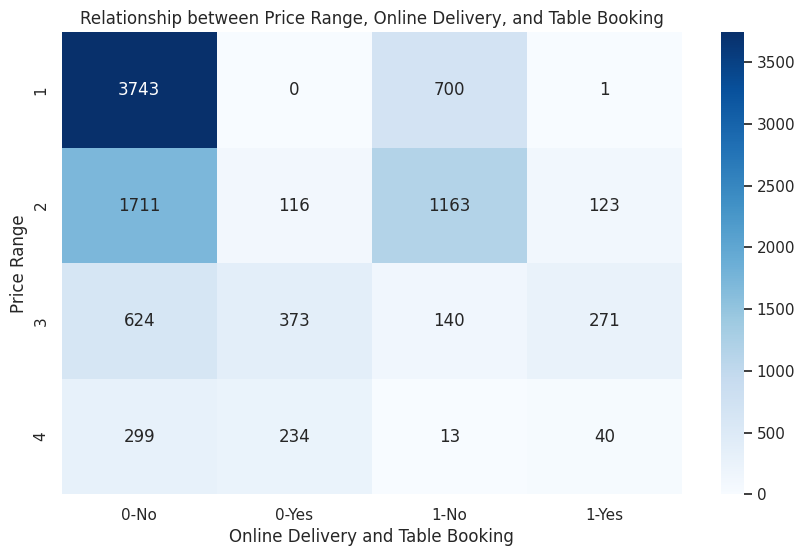

In [ ]:
# Create a pivot table for visualization
pivot_table = df.pivot_table(index='Price range', columns=['Has Online delivery', 'Has Table booking'], aggfunc='size', fill_value=0)

# Create a stacked bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title("Relationship between Price Range, Online Delivery, and Table Booking")
plt.xlabel("Online Delivery and Table Booking")
plt.ylabel("Price Range")
plt.show()

In [ ]:
df['Has Online delivery'].value_counts()

0    7100
1    2451
Name: Has Online delivery, dtype: int64

In [ ]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create horizontal bar graphs using Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=('Online Delivery', 'Table Booking'))

# Online Delivery
online_delivery_counts = df[df['Has Online delivery'] == 1].groupby('Price range').size()
fig.add_trace(go.Bar(y=online_delivery_counts.index, x=online_delivery_counts.values, orientation='h', name='Online Delivery',marker=dict(color='lightgreen')), row=1, col=1)

# Table Booking
table_booking_counts = df[df['Has Table booking']  == 'Yes'].groupby('Price range').size()
fig.add_trace(go.Bar(y=table_booking_counts.index, x=table_booking_counts.values, orientation='h', name='Table Booking',marker=dict(color='lightblue')), row=1, col=2)

# Customize the graph layout
fig.update_layout(title_text='Price Range vs Online Delivery and Table Booking', showlegend=True)
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Price Range')

# Show the graph
fig.show()

In [148]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create horizontal bar graphs using Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=('Online Delivery', 'Table Booking'))

# Online Delivery
online_delivery_counts = df[df['Has Online delivery'] == 0].groupby('Price range').size()
fig.add_trace(go.Bar(y=online_delivery_counts.index, x=online_delivery_counts.values, orientation='h', name='Online Delivery',marker=dict(color='lightgreen')), row=1, col=1)

# Table Booking
table_booking_counts = df[df['Has Table booking']  == 'No'].groupby('Price range').size()
fig.add_trace(go.Bar(y=table_booking_counts.index, x=table_booking_counts.values, orientation='h', name='Table Booking',marker=dict(color='lightblue')), row=1, col=2)

# Customize the graph layout
fig.update_layout(title_text='Price Range vs Online Delivery and Table Booking', showlegend=True)
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Price Range')

# Show the graph
fig.show()